# Data Cleaning & Consistency Checks

# Tabel of Contents

## 1. Import data & libraries
## 2. Check data shape, structure & descriptive statistics
## 3. Consistency checks
#### 3.1 Missing Values
#### 3.2 Mixed-type data
#### 3.3 Update data types
#### 3.4 Duplicates
## 4. Data Wrangling
#### 4.1 Drop columns if necessary
## 5. Frequency distribution & Outliers
#### 5.1 Frequency Tables
#### 5.2 Identifying & removing outliers or inaccurate data
## 6. Check data shape, structure & descriptive statistics after updates
## 7. Export Data

## 1. Import data & libraries

In [233]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [234]:
# Set path
path = r'C:\Users\Ryan Pares\Zomato'

# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'zomato.csv'), index_col = False)

## 2. Check data shape, structure & descriptive statistics

In [235]:
df.shape

(51717, 17)

In [236]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [237]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [238]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [239]:
df['name'].count()

51717

In [240]:
df['location'].count()

51696

## 3. Consistency checks

#### 3.1 Missing Values

In [241]:
# Check for missing values
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#### 3.2 Mixed-type data

In [242]:
# Mixed-type data
for col in df.columns:
    if df[col].apply(type).nunique() > 1:
        print(col)
    else:
        print('There is no mixed-type data')

There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
rate
There is no mixed-type data
phone
location
rest_type
dish_liked
cuisines
approx_cost(for two people)
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data


#### 3.3 Update data types

In [243]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [244]:
# Update 'approx_cost(for two people)' to numeric format
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce').fillna(0).astype(int)

In [245]:
# Update 'online_order' to boolean format
df['online_order'] = df['online_order'].astype(bool)

In [246]:
# Update 'book_table' to boolean format
df['book_table'] = df['book_table'].astype(bool)

In [247]:
df.dtypes

url                            object
address                        object
name                           object
online_order                     bool
book_table                       bool
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)     int32
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [248]:
df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,True,True,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,True,True,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,True,True,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,0,[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,True,True,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,True,True,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental",0,"[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


#### 3.4 Duplicates

In [249]:
# Create subset 'dups' to hold any duplicated rows in the dataframe. 
df_dups = df[df.duplicated()]

# If df_dups returns empty, there are no duplicates. 
# If df_dups returns values, those are the duplicates. 

df_dups

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


#### No Duplicates found

## 4. Data Wrangling

#### 4.1 Drop columns if necessary

In [250]:
# Drop 'phone' column as it is PII. 
df = df.drop(columns=['phone'])

In [251]:
# Drop 'menu_item' column as it's not relevant to analysis. 
df = df.drop(columns=['menu_item'])

In [252]:
# Drop 'dish_liked' column as it's not relevant to analysis. 
df = df.drop(columns=['dish_liked'])

In [253]:
# Drop 'url' column as it's not relevant to analysis. 
df = df.drop(columns=['url'])

In [254]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,True,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,True,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,True,True,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,True,True,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


## 5. Frequency distribution & Outliers

#### 5.1 Frequency Tables

In [255]:
df['name'].value_counts()

Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Natis                                                       1
Shreyas                                                     1
Vishwas Kabab Centre                                        1
Taj Biryani Centre                                          1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8792, dtype: int64

In [256]:
df['online_order'].value_counts()

True    51717
Name: online_order, dtype: int64

In [257]:
df['book_table'].value_counts()

True    51717
Name: book_table, dtype: int64

In [258]:
df['rate'].value_counts()

NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64

In [259]:
df['votes'].value_counts()

0       10027
4        1140
6         992
7         872
9         738
        ...  
3673        1
1862        1
3909        1
2155        1
843         1
Name: votes, Length: 2328, dtype: int64

In [260]:
df['location'].value_counts()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [261]:
df['rest_type'].value_counts()

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [262]:
df['cuisines'].value_counts()

North Indian                                   2913
North Indian, Chinese                          2385
South Indian                                   1828
Biryani                                         918
Bakery, Desserts                                911
                                               ... 
North Indian, Chinese, South Indian, Juices       1
North Indian, Chinese, Kebab, Mughlai             1
Chinese, Vietnamese, Thai, Malaysian              1
Arabian, Lebanese, Chinese, Rolls                 1
North Indian, Chinese, Arabian, Momos             1
Name: cuisines, Length: 2723, dtype: int64

In [263]:
df['approx_cost(for two people)'].value_counts()

300    7576
0      7263
400    6562
500    4980
200    4857
600    3714
250    2959
800    2285
150    2066
700    1948
350    1763
450    1417
100     993
650     776
550     761
750     758
900     700
850     166
950      62
120      24
180      20
230      10
80       10
40        8
130       8
50        8
330       4
199       4
70        3
190       2
240       2
360       2
140       2
160       1
469       1
60        1
560       1
Name: approx_cost(for two people), dtype: int64

In [264]:
df['listed_in(type)'].value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_in(type), dtype: int64

In [265]:
df['listed_in(city)'].value_counts()

BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Whitefield               1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: listed_in(city), dtype: int64

#### 5.2 Identifying & removing outliers or inaccurate data

#### Inaccurate data

In [266]:
# Removing rows of Blank values
df.dropna(subset=['rate', 'location', 'approx_cost(for two people)', 'rest_type', 'cuisines'], inplace=True)

#### It is seen from the frequency tables that columns 'online_order' & 'book_table' have only True values. Hence removed.

In [267]:
# Drop 'online_order' column as it's not relevant to analysis. 
df = df.drop(columns=['online_order'])

In [268]:
# Drop 'book_table' column as it's not relevant to analysis. 
df = df.drop(columns=['book_table'])

<function matplotlib.pyplot.show(close=None, block=None)>

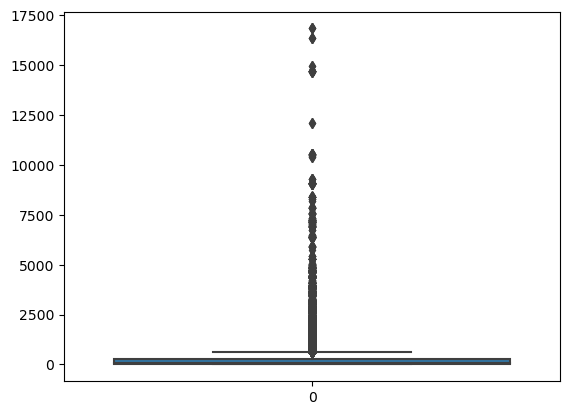

In [269]:
# Create boxplot for votes variable
sns.boxplot(data=df['votes'])
title = 'votes'
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

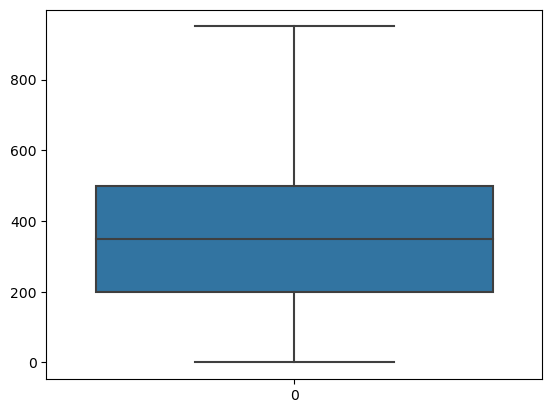

In [270]:
# Create boxplot for approx_cost(for two people) variable
sns.boxplot(data=df['approx_cost(for two people)'])
title = 'approx_cost(for two people)'
plt.show

## 6. Check data shape, structure & descriptive statistics after updates

In [271]:
df.shape

(43780, 11)

In [272]:
df.head()

,address,name,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [273]:
df.describe()

,votes,approx_cost(for two people)
count,43780.000000,43780.000000
mean,334.292439,366.119598
std,863.606279,241.857762
min,0.000000,0.000000
25%,17.000000,200.000000
50%,64.000000,350.000000
75%,255.000000,500.000000
max,16832.000000,950.000000


In [274]:
# Check for missing values
df.isnull().sum()

address                        0
name                           0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [275]:
# Mixed-type data
for col in df.columns:
    if df[col].apply(type).nunique() > 1:
        print(col)
    else:
        print('There is no mixed-type data')

There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data
There is no mixed-type data


## 7. Export Data

In [277]:
# Export Data
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'zomato.csv'), index=False)